<a href="https://colab.research.google.com/github/EslamElsolia5/ML-Projects/blob/main/laptop_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laptop price prediction
---
By 'Eslam'

In [153]:
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.5.2
# !pip install xgboost

###1) Importing the required libraries
---

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

###2) Information about data
---

In [155]:
df = pd.read_csv('/content/laptop_data.csv', index_col = 0) # index_col = 0 to remove "Unnamed: 0"	column
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [156]:
df.shape

(1303, 11)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [158]:
# Removing duplicate rows from our dataset.
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [159]:
df.groupby("Company")["TypeName"].value_counts()

Company    TypeName          
Acer       Notebook               76
           2 in 1 Convertible      8
           Gaming                  8
           Netbook                 5
           Ultrabook               4
Apple      Ultrabook              21
Asus       Notebook               62
           Gaming                 54
           Ultrabook              18
           2 in 1 Convertible     13
           Netbook                 4
Chuwi      Notebook                3
Dell       Notebook              159
           Ultrabook              49
           Gaming                 40
           2 in 1 Convertible     30
           Workstation            11
           Netbook                 2
Fujitsu    Notebook                3
Google     Ultrabook               3
HP         Notebook              180
           Ultrabook              36
           2 in 1 Convertible     19
           Workstation            14
           Gaming                 12
           Netbook                 7
Huawei     Ultrabook               2
LG         Ultrabook               3
Lenovo     Notebook              174
           2 in 1 Convertible     44
           Gaming                 32
           Ultrabook              31
           Netbook                 4
           Workstation             4
MSI        Gaming                 54
Mediacom   Notebook                6
           2 in 1 Convertible      1
Microsoft  Ultrabook               6
Razer      Gaming                  5
           Ultrabook               2
Samsung    Ultrabook               5
           2 in 1 Convertible      2
           Netbook                 1
           Notebook                1
Toshiba    Notebook               36
           Ultrabook              12
Vero       Notebook                4
Xiaomi     Notebook                2
           Ultrabook               2
Name: count, dtype: int64

###3) Null Values
---

In [160]:
df.isna().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


There are no missing values in our data set.

In [161]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


###4) Data Visualization
---

In [162]:
df_pivot = df.pivot_table(index = "Company", columns = "TypeName", values = "Price", margins = True).fillna(0)
df_pivot

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,All
Company,,,,,,,
Acer,37229.466600,78221.700000,16303.680000,29130.769895,47445.840000,0.000000,33750.986186
Apple,0.000000,0.000000,0.000000,0.000000,83340.499886,0.000000,83340.499886
Asus,52021.813292,91641.886133,14183.136000,33917.205832,72066.528000,0.000000,60143.988302
Chuwi,0.000000,0.000000,0.000000,16745.726400,0.000000,0.000000,16745.726400
Dell,60295.395360,102211.979040,27678.960000,47054.265509,78743.349257,118237.329164,63894.714408
Fujitsu,0.000000,0.000000,0.000000,38841.120000,0.000000,0.000000,38841.120000
Google,0.000000,0.000000,0.000000,0.000000,89386.080000,0.000000,89386.080000
HP,80282.836800,75875.160000,65777.965714,43698.873680,81898.848800,122527.064571,57559.165307
Huawei,0.000000,0.000000,0.000000,0.000000,75870.720000,0.000000,75870.720000


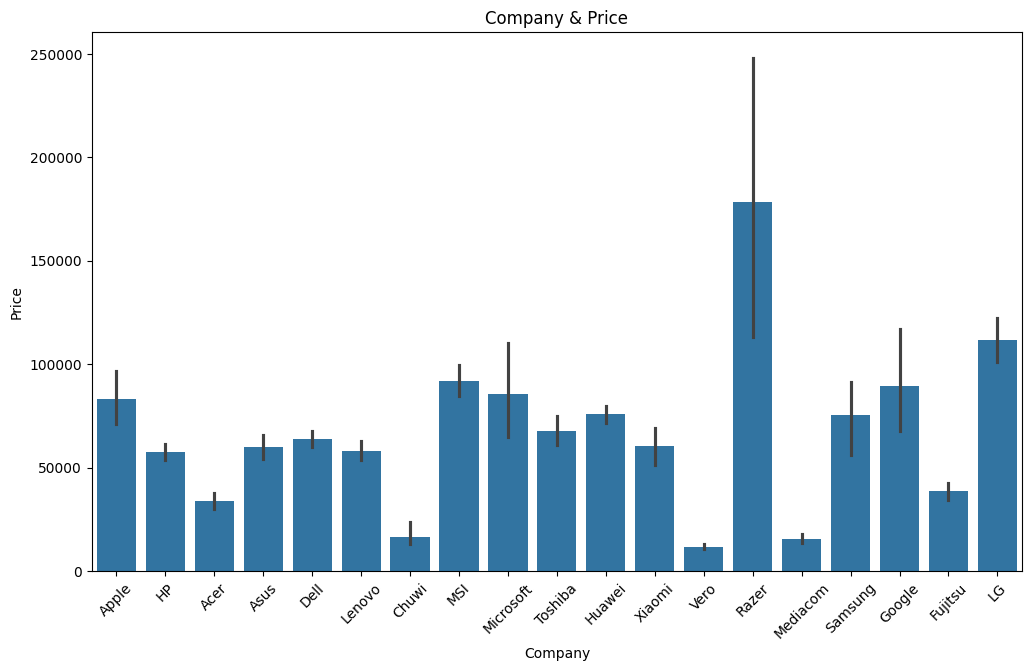

In [163]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "Company", y = "Price", data = df)
plt.title("Company & Price")
plt.xticks(rotation = 45)
plt.show()
plt.show()

From this figure, it is clear that the company with the highest price for its laptops is Razer.

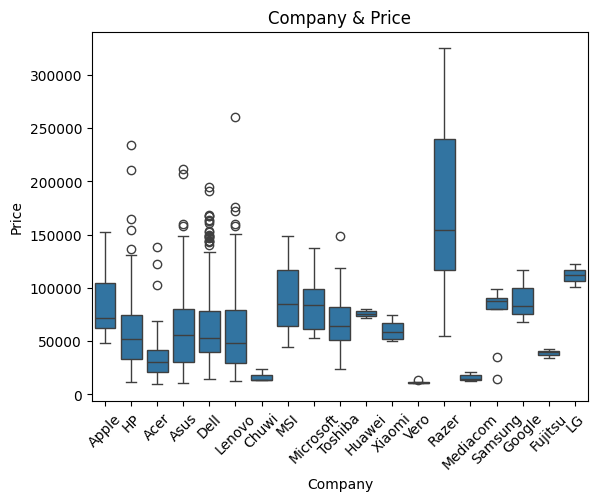

In [164]:
sns.boxplot(x = "Company", y = "Price", data = df)
plt.xticks(rotation = 45)
plt.title("Company & Price")
plt.show()

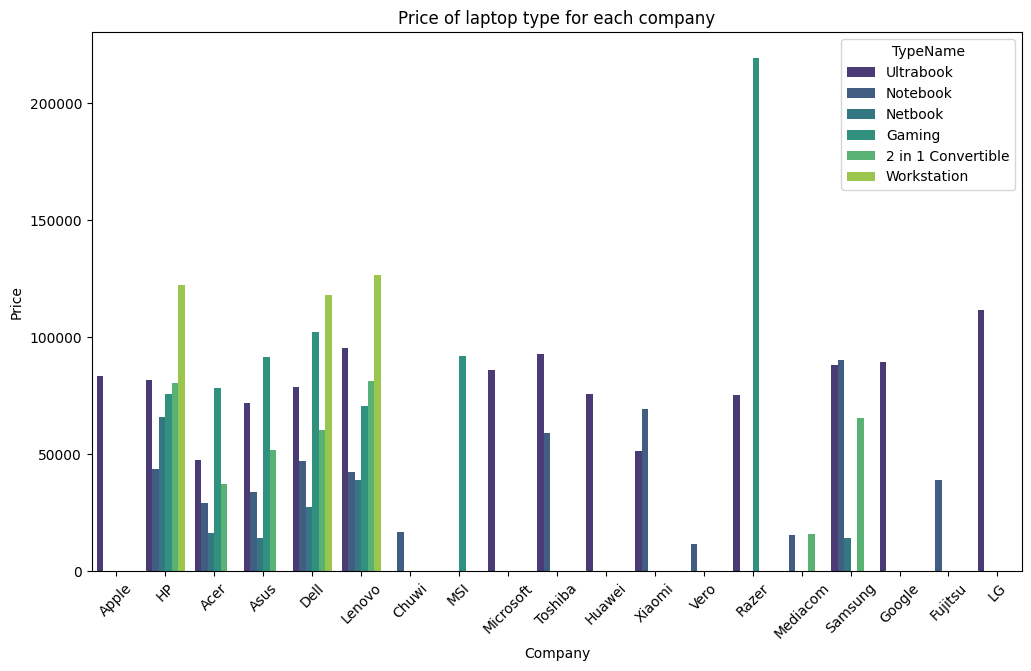

In [165]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "Company", y = "Price", data = df, errorbar=None, hue = "TypeName", palette = "viridis")
plt.xticks(rotation = 45)
plt.title("Price of laptop type for each company")
plt.show()

The highest laptop type price in a Razer company is the 'Gaming' laptop

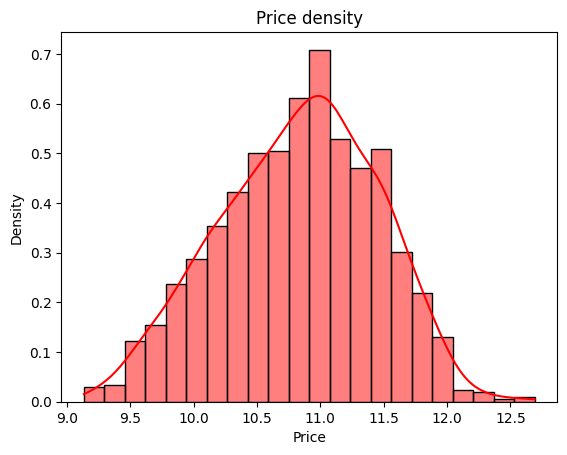

59874.14171519782


In [166]:
sns.histplot(np.log(df["Price"]), kde = True, color = "red", stat= "density")
plt.title("Price density")
plt.show()
print(np.exp(11))

The highest density of price is about 59874

In [167]:
print(df["Weight"].values)
df["Weight"] = df["Weight"].str.replace("kg", "")
df["Weight"] = df["Weight"].astype(float)

['1.37kg' '1.34kg' '1.86kg' ... '1.3kg' '1.5kg' '2.19kg']


In [168]:
print(df["Ram"].values)
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Ram"] = df["Ram"].astype(float)

['8GB' '8GB' '8GB' ... '16GB' '2GB' '6GB']


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   float64
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(4), object(7)
memory usage: 119.4+ KB


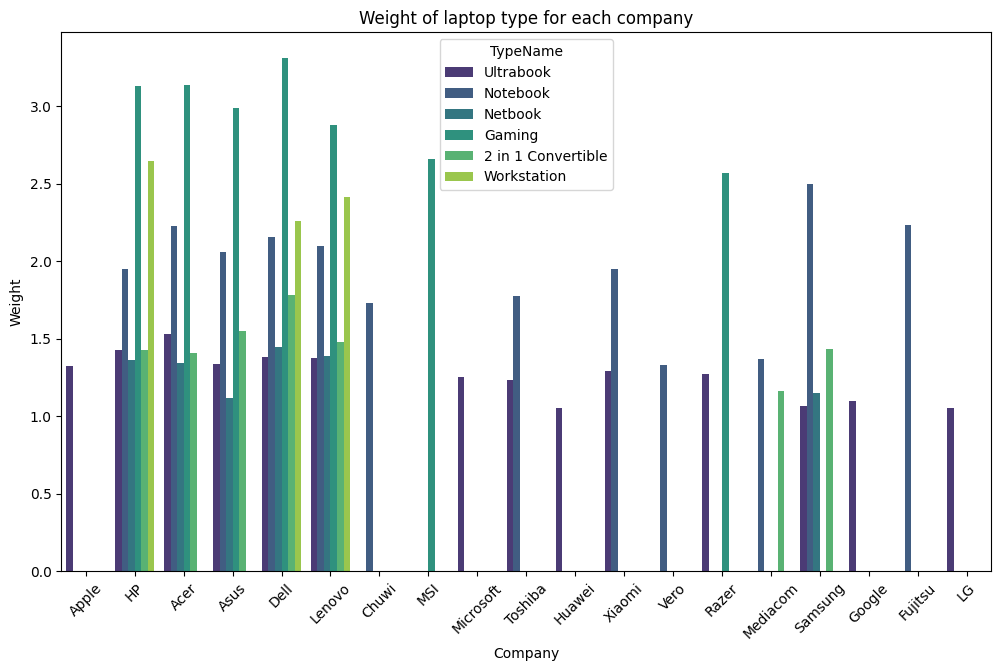

In [170]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "Company", y = "Weight", data = df, errorbar = None,hue = "TypeName" , palette = "viridis")
plt.xticks(rotation = 45)
plt.title("Weight of laptop type for each company")
plt.show()

"Gaming" laptops are clearly the heaviest of all the companies while the lightest of them all is the "Ultra" laptops.

In [171]:
df.groupby("Company")["Price"].mean().sort_values(ascending = False)

,Price
Company,
Razer,178282.491429
LG,111834.720000
MSI,92116.226133
Google,89386.080000
Microsoft,85903.788000
Apple,83340.499886
Huawei,75870.720000
Samsung,75308.320000
Toshiba,67549.050000


In [172]:
# Converting categorical feature into numerical features to show the correlation between features
label_encoder = LabelEncoder()
for col in df.select_dtypes(include = ["object"]).columns:
  df[col] = label_encoder.fit_transform(df[col])

In [173]:
df.dtypes

,0
Company,int64
TypeName,int64
Inches,float64
ScreenResolution,int64
Cpu,int64
Ram,float64
Memory,int64
Gpu,int64
OpSys,int64
Weight,float64


In [174]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8.0,4,58,8,1.37,71378.6832
1,1,4,13.3,1,63,8.0,2,51,8,1.34,47895.5232
2,7,3,15.6,8,74,8.0,16,53,4,1.86,30636.0000
3,1,4,15.4,25,85,16.0,29,9,8,1.83,135195.3360
4,1,4,13.3,23,67,8.0,16,59,8,1.37,96095.8080


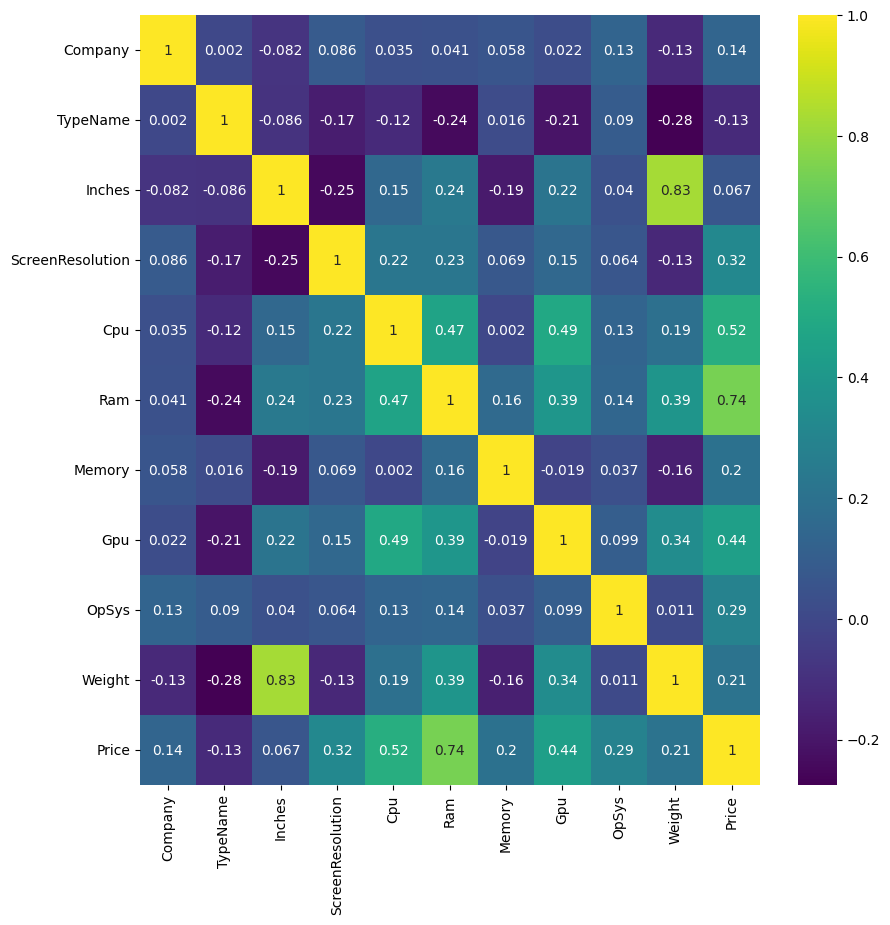

In [175]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = ".2g", cmap = "viridis")
plt.show()

All correaltions between features are weak correlations except the correltion between 'Weight' and 'Inches' are strong positive correlation and fairly strong positive correlation between 'Ram' and 'Price' columns.

###5) Building Models
---

In [176]:
X = df.drop("Price", axis = 1)
y = np.log(df["Price"] + 1e-8)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [178]:
Scaling_Features = StandardScaler()
X_train = Scaling_Features.fit_transform(X_train)
X_test = Scaling_Features.transform(X_test)

In [179]:
linear_regression = LinearRegression(n_jobs = -1)

ridge = Ridge(max_iter = 500, alpha = 0.001, solver = "auto")

decision_tree = DecisionTreeRegressor(max_depth = 5 ,random_state = 42,min_samples_split= 10, min_samples_leaf= 3)

random_forest = RandomForestRegressor(max_depth = 5 ,n_estimators = 100, random_state = 42,min_samples_split= 10,
                                      min_samples_leaf= 3)
svr = SVR(kernel = "linear")

xgb = XGBRegressor(max_depth = 5 ,n_estimators = 100, random_state = 42,min_samples_split= 10, min_samples_leaf= 3)

In [180]:
linear_regression = LinearRegression(n_jobs = -1)
ridge = Ridge(max_iter = 500, alpha = 0.001, solver = "auto")
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svr = SVR()
xgb = XGBRegressor()

In [181]:
param_grid = [
    {
    "estimator" : [linear_regression],
    },
    {
        "estimator" : [ridge],
    },
    {
        "estimator" : [decision_tree],
        "estimator__max_depth" : np.array([5, 10, 15, 20]),
        "estimator__min_samples_split" : np.array([2, 5, 10, 20]),
        "estimator__min_samples_leaf" : np.array([1, 2, 5, 10]),
    },
    {
        "estimator" : [random_forest],
        "estimator__max_depth" : np.array([5, 10, 15, 20]),
        "estimator__n_estimators" : np.array([100,150 ,200, 250]),
        "estimator__min_samples_split" : np.array([2, 5, 10, 20]),
        "estimator__min_samples_leaf" : np.array([1, 2, 5, 10]),
    },
    {
        "estimator" : [svr],
        "estimator__kernel" : ["linear", "poly", "rbf"],
        "estimator__C" : np.array([0.001, 0.01, 0.1]),
        "estimator__gamma" : np.array(["scale", "auto"]),
    },
    {
        "estimator" : [xgb],
        "estimator__max_depth" : np.array([5, 10, 15, 20]),
        "estimator__n_estimators" : np.array([100,150 ,200, 250]),
    },
]

In [182]:
pipeline = Pipeline([("estimator" , linear_regression)])
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('estimator',
                                        LinearRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid=[{'estimator': [LinearRegression(n_jobs=-1)]},
                         {'estimator': [Ridge(alpha=0.001, max_iter=500)]},
                         {'estimator': [DecisionTreeRegressor()],
                          'estimator__max_depth': array([ 5, 10, 15, 20]),
                          'estimator__min_samples_leaf': array([ 1,  2,  5, 10]),
                          'estimator__min_s...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...)],
                          'estimator__max_depth': array([ 5, 10, 15, 20]),
                          'estimator__n_estimators': array([100, 150, 200, 250])}])

In [183]:
grid_search.best_score_

0.8966639945099301

**The best accuracy after training these models is about 90%**

In [184]:
best_model = grid_search.best_estimator_

In [185]:
y_pred = best_model.predict(X_test)
y_pred

array([10.045186 , 10.481714 , 10.859438 , 10.778387 , 10.98044  ,
       10.63417  , 11.271029 , 10.258924 , 10.829787 , 10.437183 ,
       11.052701 , 11.612521 , 10.8470545, 11.34227  , 10.784542 ,
       11.349463 , 11.406163 , 11.534115 , 11.17736  ,  9.89314  ,
       10.909803 , 10.337121 , 10.858076 , 10.890881 , 11.508247 ,
       11.344156 , 11.2167845, 11.221129 , 11.22844  , 11.150335 ,
       11.117504 , 11.336783 , 10.828982 , 10.712652 , 11.257815 ,
       10.703167 , 11.656482 , 10.327291 , 10.984953 , 10.147419 ,
       12.115942 , 11.847612 , 11.087505 , 11.587231 , 10.707969 ,
       10.807782 , 11.147288 , 11.00743  , 10.9974165, 11.24404  ,
       11.09097  , 10.986258 ,  9.7111025, 11.072204 , 10.704301 ,
        9.535597 , 10.531532 ,  9.773173 , 10.902994 ,  9.786435 ,
       11.033273 , 11.276441 , 10.970388 ,  9.875219 , 10.604208 ,
       11.033183 , 11.887971 , 11.01708  , 10.170799 , 11.078167 ,
       11.261134 , 11.529327 , 10.693905 , 11.381754 , 10.8603

In [186]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04222623395351797


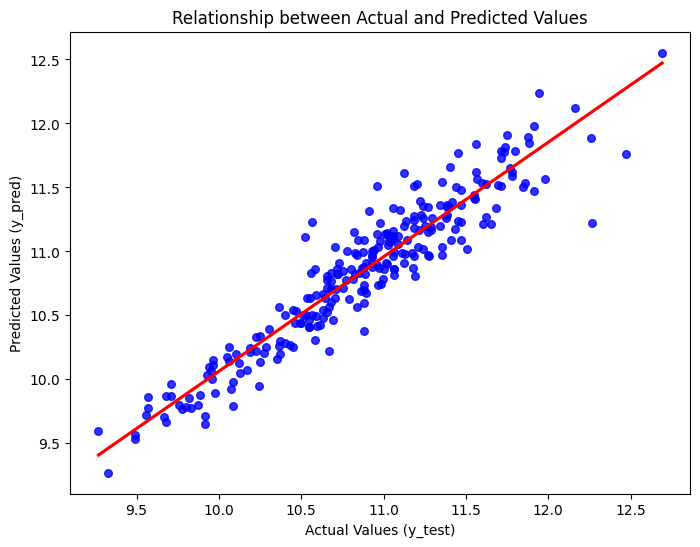

In [187]:
plt.figure(figsize=(8, 6))

sns.regplot(x=y_test, y=y_pred, scatter_kws = {"s" : 30, "color" : "b"},line_kws = {"color" : "r"} , ci = None)

plt.title("Relationship between Actual and Predicted Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")

plt.show()


###6) Saving the trained model
---

In [188]:
import sklearn.svm as s
import joblib as jb

In [189]:
jb.dump(grid_search, "grid_search.sav")

['grid_search.sav']

In [190]:
jb.load("grid_search.sav")

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('estimator',
                                        LinearRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid=[{'estimator': [LinearRegression(n_jobs=-1)]},
                         {'estimator': [Ridge(alpha=0.001, max_iter=500)]},
                         {'estimator': [DecisionTreeRegressor()],
                          'estimator__max_depth': array([ 5, 10, 15, 20]),
                          'estimator__min_samples_leaf': array([ 1,  2,  5, 10]),
                          'estimator__min_s...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...)],
                          'estimator__max_depth': array([ 5, 10, 15, 20]),
                          'estimator__n_estimators': array([100, 150, 200, 250])}])